# Trabajo Práctico de Probabilidad y Estadística | Regresión Lineal


## Importar librerías

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [ ]:
from IPython.display import Image
from base64 import b64decode
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore') # o warnings.filterwarnings(action='once')

## Lectura de los datos

In [ ]:
url1 = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2022.csv"
url2 = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2021.csv"

df1 = pd.read_csv(url1, delimiter=";")
df2 = pd.read_csv(url2, delimiter=";")

df1["periodo"] = 2022
df2["periodo"] = 2021

frames = [df1, df2]
df = pd.concat(frames)

## Visualizar los datos

In [ ]:
df.head()

,UPM,NVIVI,NHOGA,DPTOREP,AREA,L02,P02,P03,P04,P04A,...,decilai,informalidad,periodo,A18A,B05A,E02D1,E02D2,E02B,ingrepytyvõde,ingresect_privadode
0,30,1,1,0,1,1,42,1,1,1,...,6,1,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,1,1,0,1,2,14,3,1,1,...,6,,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,1,1,0,1,3,12,3,1,1,...,6,,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,1,1,0,1,4,20,3,1,1,...,6,,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,1,1,0,1,5,25,6,1,1,...,6,2,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verificar el tamaño del conjunto de datos

In [ ]:
df.shape

(33948, 258)

## Preprocesamiento

In [ ]:
# Seleccionamos las columnas en las que estamos interesados
edad = [
    {
        "P02": {
            "renombrar": "edad",
            "descripcion": "Edad del miembro del hogar",
            "mapper": None,
        }
    },
]

periodo = [
    {
        "periodo": {
            "renombrar": "periodo",
            "descripcion": "Año en que se obtuvieron los datos.",
            "mapper": None,
        }
    },
]

sexo = [
    {
        "P06": {
            "renombrar": "sexo",
            "descripcion": "Sexo",
            "mapper": pd.read_csv(io.StringIO('''
Hombres,1
Mujeres,6
'''), header=None)
            }
        },
]

nivel_educativo = [
    {
      "añoest": {
            "renombrar": "anhos_estudio",
            "descripcion": "Años de estudio",
            "mapper": None,
        }
    },
    {
        "ED0504": {
            "renombrar": "educacion_nivel_mas_alto",
            "descripcion": "Nivel y grado más alto que aprobó",
            "mapper": pd.read_csv(io.StringIO('''
Sin instrucción,0
Educación especial,101:112
Educación Inicial,210:212
EEB 1ª al 6ª (Primaria),301:306
EEB 7º al 9º,407:409
Secundario Básico,501:503
Bachiller Humanístico/Científico,604:607
Bachiller Técnico/Comercial,704:706
Bachillerato a distancia,803
Educación Media Científica,901:903
Educación Media Técnica,1001:1003
Educación Media Abierta,1101:1103
Educ. Básica Bilingüe para personas Jóvenes y Adultas,1201:1204
Educ. Media a Distancia para Jóvenes y Adultos,1301:1304
Educ. Básica Alternativa de Jóvenes y Adultos,1401:1403
Educ. Media Alternativa de Jóvenes y Adultos,1501:1504
Educ. Media para Jóvenes y Adultos,1601:1604
Formación profesional no Bachillerato de la Media,1701:1703
Programa de Alfabetización,1801
Grado especial/Programas especiales,1900
Técnica Superior,2001:2004
Formación Docente,2101:2104
Profesionalización Docente,2201:2206
Formación Militar/Policial,2301:2304
Universitario,2401:2406
NR,9999
NA,8888
'''), header=None),
        }
    },
]
ocupacion = [
    {
        "B01REC": {
            "renombrar": "ocupacion_principal",
            "descripcion": "Código ocupación principal en los últimos 7 días",
            "mapper": pd.read_csv(io.StringIO('''
"Miembros del Poder Ejecutivo, Legislativo y Judicial, personal directivo de la Administración pública y de empresa",1
Profesionales científicos e intelectuales,2
Técnicos y profesionales de nivel medio,3
Empleados de oficina,4
Trabajadores de los servicios y vendedores de comercios y mercados,5
Agricultores y trabajadores Agropecuarios y Pesqueros,6
"Oficiales, operarios y artesanos de artes mecánicas y de otros oficios",7
Operadores de instalaciones y máquinas y montadores,8
Trabajadores no calificados,9
Fuerzas armadas,10
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
        "B02REC": {
            "renombrar": "ocupacion_rama",
            "descripcion": "Código rama de actividad ocupación principal",
            "mapper": pd.read_csv(io.StringIO('''
"Agricultura, ganadería, caza, silvicultura y pesca",1
Industrias manufactureras,2
"Electricidad, gas y agua",3
Construcciones,4
"Comercio al por mayor y menor, restaurantes y hoteles",5
"Transporte, almacenamiento y comunicaciones",6
"Establecimientos financieros, seguros, bienes inmuebles y servicios prestados a las empresas",7
"Servicios comunales, sociales y personales",8
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
      "B07A": {
            "renombrar": "anhos_experiencia_laboral",
            "descripcion": "Años de su vida que ha trabajado en ésta ocupación",
            "mapper": None,
        }
    },
]

ingresos = [
    {
        "e01aimde": {
            "renombrar": "ingreso_mensual_actividad_principal",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad principal",
            "mapper": None,
        }
    },
    {
        "e01bimde": {
            "renombrar": "ingreso_mensual_actividad_secundaria",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad secundaria",
            "mapper": None,
        }
    },
    {
        "e01cimde": {
            "renombrar": "ingreso_mensual_otras_actividades",
            "descripcion": "Ingreso mensual que habitualmente recibe de todas las otras actividades",
            "mapper": None,
        }
    },
    {
        "e01dde": {
            "renombrar": "ingreso_alquileres",
            "descripcion": "Ingreso mensual que habitualmente recibe por alquileres o rentas neto",
            "mapper": None,
        }
    },
    {
        "e01ede": {
            "renombrar": "ingreso_dividendos",
            "descripcion": "Ingreso mensual que habitualmente recibe por intereses, dividendos o utilidades",
            "mapper": None,
        }
    },
    {
        "e01fde": {
            "renombrar": "ingreso_ayuda_familiar_nacional",
            "descripcion": "Ingreso mensual que habitualmente recibe como ayuda familiar del país",
            "mapper": None,
        }
    },
    {
        "e02bde": {
            "renombrar": "ingreso_ayuda_familiar_extranjero",
            "descripcion": "Ingreso mensual que habitualmente recibe de ayuda familiar del exterior",
            "mapper": None,
        }
    },
    {
        "e01gde": {
            "renombrar": "ingreso_prestaciones_divorcio_hijos",
            "descripcion": "Ingreso mensual prestaciones por divorcios o cuidado de hijos",
            "mapper": None,
        }
    },
    {
        "e01hde": {
            "renombrar": "ingreso_jubilacion",
            "descripcion": "Ingreso mensual por jubilación",
            "mapper": None,
        }
    },
    {
        "e01ide": {
            "renombrar": "ingreso_estado_tekopora",
            "descripcion": "Ingreso mensual del Estado (Monetario: Tekoporã)",
            "mapper": None,
        }
    },
    {
        "e01jde": {
            "renombrar": "ingreso_pension",
            "descripcion": "Ingreso mensual Pensión (ex combatiente,viudas,etc)",
            "mapper": None,
        }
    },
    {
        "e01kde": {
            "renombrar": "ingreso_pension_adulto_mayor",
            "descripcion": "Ingreso mensual del Estado (Monetario: Adulto Mayor)",
            "mapper": None,
        }
    },
    {
        "e01lde": {
            "renombrar": "ingreso_publico_viveres",
            "descripcion": "Ingreso por víveres de alguna Institución pública",
            "mapper": None,
        }
    },
    {
        "e01mde": {
            "renombrar": "ingreso_otros_varios",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos",
            "mapper": None,
        }
    },
    {
        "e01kjde": {
            "renombrar": "ingreso_agro",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos agro asignados al jefe",
            "mapper": None,
        }
    },
    {
        "quintili": {
            "renombrar": "quintil",
            "descripcion": "Quintiles de ingreso per cápita mensual para el total país.",
            "mapper": None,
        }
    },
]

def obtener_claves(lista):
    return [list(d.keys())[0] for d in lista]

columnas_seleccionadas = obtener_claves(edad + sexo + ocupacion + ingresos + nivel_educativo + periodo)

In [ ]:
df = df[columnas_seleccionadas]
df.columns

Index(['P02', 'P06', 'B01REC', 'B02REC', 'B07A', 'e01aimde', 'e01bimde',
       'e01cimde', 'e01dde', 'e01ede', 'e01fde', 'e02bde', 'e01gde', 'e01hde',
       'e01ide', 'e01jde', 'e01kde', 'e01lde', 'e01mde', 'e01kjde', 'quintili',
       'añoest', 'ED0504', 'periodo'],
      dtype='object')

In [ ]:
# renombramos columnas
def renombrar_columnas(df, lista):
    for d in lista:
        for k, v in d.items():
            df.rename(columns={k: v["renombrar"]}, inplace=True)

renombrar_columnas(df, edad + sexo + ocupacion + ingresos + nivel_educativo + periodo)

In [ ]:
# Reemplazar cadenas vacías y valores 999 con NaN
df.replace([" ", "9999", "8888", "999", "99"], np.nan, inplace=True)

# Reemplazar el valor 0 (mujeres) con 1 en la columna de sexo
df["sexo"].replace(0, 1, inplace=True)

# Reemplazar el valor 6 (hombres) con 2 en la columna de sexo
df["sexo"].replace(6, 2, inplace=True)

# Contar la cantidad de nulos por columna
print(df.isnull().sum())

edad                                        0
sexo                                        0
ocupacion_principal                     17283
ocupacion_rama                          17282
anhos_experiencia_laboral               17292
ingreso_mensual_actividad_principal         0
ingreso_mensual_actividad_secundaria        0
ingreso_mensual_otras_actividades           0
ingreso_alquileres                          0
ingreso_dividendos                          0
ingreso_ayuda_familiar_nacional             0
ingreso_ayuda_familiar_extranjero           0
ingreso_prestaciones_divorcio_hijos         0
ingreso_jubilacion                          0
ingreso_estado_tekopora                     0
ingreso_pension                             0
ingreso_pension_adulto_mayor                0
ingreso_publico_viveres                     0
ingreso_otros_varios                        0
ingreso_agro                                0
quintil                                    66
anhos_estudio                     

In [ ]:
# Hacer drop de las filas con datos nulos
df.dropna(inplace=True)

In [ ]:
# Contar la cantidad de nulos por columna
print(df.isnull().sum())

edad                                    0
sexo                                    0
ocupacion_principal                     0
ocupacion_rama                          0
anhos_experiencia_laboral               0
ingreso_mensual_actividad_principal     0
ingreso_mensual_actividad_secundaria    0
ingreso_mensual_otras_actividades       0
ingreso_alquileres                      0
ingreso_dividendos                      0
ingreso_ayuda_familiar_nacional         0
ingreso_ayuda_familiar_extranjero       0
ingreso_prestaciones_divorcio_hijos     0
ingreso_jubilacion                      0
ingreso_estado_tekopora                 0
ingreso_pension                         0
ingreso_pension_adulto_mayor            0
ingreso_publico_viveres                 0
ingreso_otros_varios                    0
ingreso_agro                            0
quintil                                 0
anhos_estudio                           0
educacion_nivel_mas_alto                0
periodo                           

In [ ]:
# Cambiar el tipo de dato de horas trabajadas a int
df["ocupacion_rama"] = df["ocupacion_rama"].astype(int)
df["educacion_nivel_mas_alto"] = df["educacion_nivel_mas_alto"].astype(int)
df["anhos_estudio"] = df["anhos_estudio"].astype(int)
df["anhos_experiencia_laboral"] = df["anhos_experiencia_laboral"].astype(int)
df["quintil"] = df["quintil"].astype(int)

### Mapear valores de educación

In [ ]:


# Reemplazar las cadenas vacías en el campo educacion_nivel_mas_alto con 0
df["educacion_nivel_mas_alto"] = df["educacion_nivel_mas_alto"].replace(" ", 0)

# Crear una nueva columna que contenga la descripción del nivel más alto
# cursado de educación
educacion_dict = {
    "Sin instrucción": [0],
    "Educación especial": list(range(101, 113)),
    "Educación Inicial": list(range(210, 213)),
    "EEB 1ª al 6ª (Primaria)": list(range(301, 307)),
    "EEB 7º al 9º": list(range(407, 410)),
    "Secundario Básico": list(range(501, 504)),
    "Bachiller Humanístico/Científico": list(range(604, 608)),
    "Bachiller Técnico/Comercial": list(range(704, 707)),
    "Bachillerato a distancia": [803],
    "Educación Media Científica": list(range(901, 904)),
    "Educación Media Técnica": list(range(1001, 1004)),
    "Educación Media Abierta": list(range(1101, 1104)),
    "Educ. Básica Bilingüe para personas Jóvenes y Adultas": list(range(1201, 1205)),
    "Educ. Media a Distancia para Jóvenes y Adultos": list(range(1301, 1305)),
    "Educ. Básica Alternativa de Jóvenes y Adultos": list(range(1401, 1404)),
    "Educ. Media Alternativa de Jóvenes y Adultos": list(range(1501, 1505)),
    "Educ. Media para Jóvenes y Adultos": list(range(1601, 1605)),
    "Formación profesional no Bachillerato de la Media": list(range(1701, 1704)),
    "Programa de Alfabetización": [1801],
    "Grado especial/Programas especiales": [1900],
    "Técnica Superior": list(range(2001, 2005)),
    "Formación Docente": list(range(2101, 2105)),
    "Profesionalización Docente": list(range(2201, 2207)),
    "Formación Militar/Policial": list(range(2301, 2305)),
    "Universitario": list(range(2401, 2407))
}

def obtener_etiqueta_educacion(valor):
    for etiqueta, rango in educacion_dict.items():
        if valor in rango:
            return etiqueta
    return "Desconocido"  # Para valores que no están en ningún rango

# Asignar la etiqueta del nivel de educación según el diccionario de datos
df["educacion"] = df["educacion_nivel_mas_alto"].apply(obtener_etiqueta_educacion)

df["educacion"].value_counts().sort_values(ascending=False)


educacion
EEB 1ª al 6ª (Primaria)                                  5817
Universitario                                            3412
Educación Media Científica                               2326
Bachiller Humanístico/Científico                         1240
EEB 7º al 9º                                             1239
Secundario Básico                                        1031
Formación Docente                                         395
Educación Media Técnica                                   262
Técnica Superior                                          216
Bachiller Técnico/Comercial                               131
Educ. Media para Jóvenes y Adultos                         79
Sin instrucción                                            70
Formación Militar/Policial                                 68
Educ. Básica Bilingüe para personas Jóvenes y Adultas      54
Educ. Básica Alternativa de Jóvenes y Adultos              16
Educ. Media Alternativa de Jóvenes y Adultos                

In [ ]:
df.drop("educacion_nivel_mas_alto", axis=1, inplace=True)

In [ ]:
df.head()

,edad,sexo,ocupacion_principal,ocupacion_rama,anhos_experiencia_laboral,ingreso_mensual_actividad_principal,ingreso_mensual_actividad_secundaria,ingreso_mensual_otras_actividades,ingreso_alquileres,ingreso_dividendos,...,ingreso_estado_tekopora,ingreso_pension,ingreso_pension_adulto_mayor,ingreso_publico_viveres,ingreso_otros_varios,ingreso_agro,quintil,anhos_estudio,periodo,educacion
0,42,2,9,5,5,"1985645,933",0,0,0,0,...,0,0,0,0,0,0,4,6,2022,EEB 1ª al 6ª (Primaria)
4,25,1,8,2,4,"4964114,833",0,0,0,0,...,0,0,0,0,0,0,4,13,2022,Técnica Superior
5,50,1,5,5,33,"2978468,9",0,0,0,0,...,0,0,0,0,0,0,3,12,2022,Bachiller Humanístico/Científico
6,50,2,5,5,33,0,0,0,0,0,...,0,0,0,0,0,0,3,9,2022,Secundario Básico
9,25,2,3,6,8,"4964114,833",0,0,0,0,...,0,0,0,0,0,0,4,16,2022,Universitario


### Mapear valores de código de rama de la ocupación

In [ ]:
# Diccionario de mapeo
activity_mapping = {
    1: "Agricultura, ganadería, caza, silvicultura y pesca",
    2: "Industrias manufactureras",
    3: "Electricidad, gas y agua",
    4: "Construcciones",
    5: "Comercio al por mayor y menor, restaurantes y hoteles",
    6: "Transporte, almacenamiento y comunicaciones",
    7: "Establecimientos financieros, seguros, bienes inmuebles y servicios prestados a las empresas",
    8: "Servicios comunales, sociales y personales",
    99: "NR",
    0: "NA"
}

df["ocupacion_rama_des"] = df["ocupacion_rama"].map(activity_mapping)

In [ ]:
# Transformamos las variables numericas a su correspondiente
def convertir_a_entero_redondeado(s):
    if type(s) == str:
        s_sin_comas = s.replace(',', '.')
        s_sin_comas = float(s_sin_comas)
        numero_redondeado = round(float(s_sin_comas))
        return int(numero_redondeado)
    else:
        return s

for c in df.columns:
    if c.startswith("ingreso_"):
        print(c)
        df[c] = df[c].apply(convertir_a_entero_redondeado)

ingreso_mensual_actividad_principal
ingreso_mensual_actividad_secundaria
ingreso_mensual_otras_actividades
ingreso_alquileres
ingreso_dividendos
ingreso_ayuda_familiar_nacional
ingreso_ayuda_familiar_extranjero
ingreso_prestaciones_divorcio_hijos
ingreso_jubilacion
ingreso_estado_tekopora
ingreso_pension
ingreso_pension_adulto_mayor
ingreso_publico_viveres
ingreso_otros_varios
ingreso_agro


In [ ]:
# Crear una nueva columna 'ingreso_total' como la suma de todos los ingresos
# Lista de columnas a sumar
columnas_a_sumar = [
    "ingreso_mensual_actividad_principal",
    "ingreso_mensual_actividad_secundaria",
    "ingreso_mensual_otras_actividades",
    "ingreso_alquileres",
    "ingreso_dividendos",
    "ingreso_ayuda_familiar_nacional",
    "ingreso_ayuda_familiar_extranjero",
    "ingreso_prestaciones_divorcio_hijos",
    "ingreso_jubilacion",
    "ingreso_estado_tekopora",
    "ingreso_pension",
    "ingreso_pension_adulto_mayor",
    "ingreso_publico_viveres",
    "ingreso_otros_varios",
    "ingreso_agro"
]

df["ingreso_total"] = df[columnas_a_sumar].sum(axis=1)
df.drop(columnas_a_sumar, axis=1, inplace=True)

In [ ]:
df.shape

(16386, 11)

## Mantener solo los datos de hombres con ingreso total menor o igual a 40 millones y de edad entre 22 y 55

In [ ]:
mask = (
    (df["ingreso_total"] > 0) &
    (df["ingreso_total"] <= 40000000) &
    (df["edad"] >= 22) &
    (df["edad"] <= 55) &
    (df["sexo"] == 2)
)
df = df[mask]

# Introducción

Se pretende determinar si existe una correlación significativa entre la cantidad de años de estudio y el ingreso total de los hombres, utilizando datos de la Encuesta Permanente de Hogares (EPH) de Paraguay de los años 2021 y 2022, mediante un modelo de regresión lineal simple.
La muestra está compuesta por 4421 hombres de 22 a 55 años en todo el país, con un ingreso total superior a 0 y menor o igual a 40 millones de guaraníes.


In [ ]:
print("Total de muestras:", len(df))

Total de muestras: 4421


## Seleccionar variables

In [ ]:
variable_y = "ingreso_total"
variable_x = "anhos_estudio"

## Hipótesis
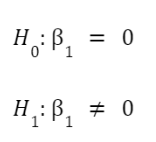

## Volver a visualizar los datos luego del preprocesamiento

In [ ]:
df.head()

,edad,sexo,ocupacion_principal,ocupacion_rama,anhos_experiencia_laboral,quintil,anhos_estudio,periodo,educacion,ocupacion_rama_des,ingreso_total
0,42,2,9,5,5,4,6,2022,EEB 1ª al 6ª (Primaria),"Comercio al por mayor y menor, restaurantes y ...",2482057
9,25,2,3,6,8,4,16,2022,Universitario,"Transporte, almacenamiento y comunicaciones",4964115
12,50,2,5,5,10,1,12,2022,Bachiller Humanístico/Científico,"Comercio al por mayor y menor, restaurantes y ...",1919493
26,29,2,7,2,6,2,12,2022,Educación Media Técnica,Industrias manufactureras,1985646
40,48,2,1,7,12,5,16,2022,Universitario,"Establecimientos financieros, seguros, bienes ...",5020161


In [ ]:
df.tail()

,edad,sexo,ocupacion_principal,ocupacion_rama,anhos_experiencia_laboral,quintil,anhos_estudio,periodo,educacion,ocupacion_rama_des,ingreso_total
16501,39,2,5,5,0,2,12,2021,Bachiller Técnico/Comercial,"Comercio al por mayor y menor, restaurantes y ...",692749
16507,41,2,7,2,18,5,9,2021,Secundario Básico,Industrias manufactureras,1900000
16511,31,2,5,5,3,4,7,2021,EEB 7º al 9º,"Comercio al por mayor y menor, restaurantes y ...",2490000
16528,38,2,9,8,8,4,6,2021,EEB 1ª al 6ª (Primaria),"Servicios comunales, sociales y personales",2300000
16543,29,2,5,8,1,5,12,2021,Educación Media Científica,"Servicios comunales, sociales y personales",1500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4421 entries, 0 to 16543
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       4421 non-null   int64 
 1   sexo                       4421 non-null   int64 
 2   ocupacion_principal        4421 non-null   object
 3   ocupacion_rama             4421 non-null   int64 
 4   anhos_experiencia_laboral  4421 non-null   int64 
 5   quintil                    4421 non-null   int64 
 6   anhos_estudio              4421 non-null   int64 
 7   periodo                    4421 non-null   int64 
 8   educacion                  4421 non-null   object
 9   ocupacion_rama_des         4421 non-null   object
 10  ingreso_total              4421 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 414.5+ KB


array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'sexo'}>,
        <Axes: title={'center': 'ocupacion_rama'}>],
       [<Axes: title={'center': 'anhos_experiencia_laboral'}>,
        <Axes: title={'center': 'quintil'}>,
        <Axes: title={'center': 'anhos_estudio'}>],
       [<Axes: title={'center': 'periodo'}>,
        <Axes: title={'center': 'ingreso_total'}>, <Axes: >]],
      dtype=object)

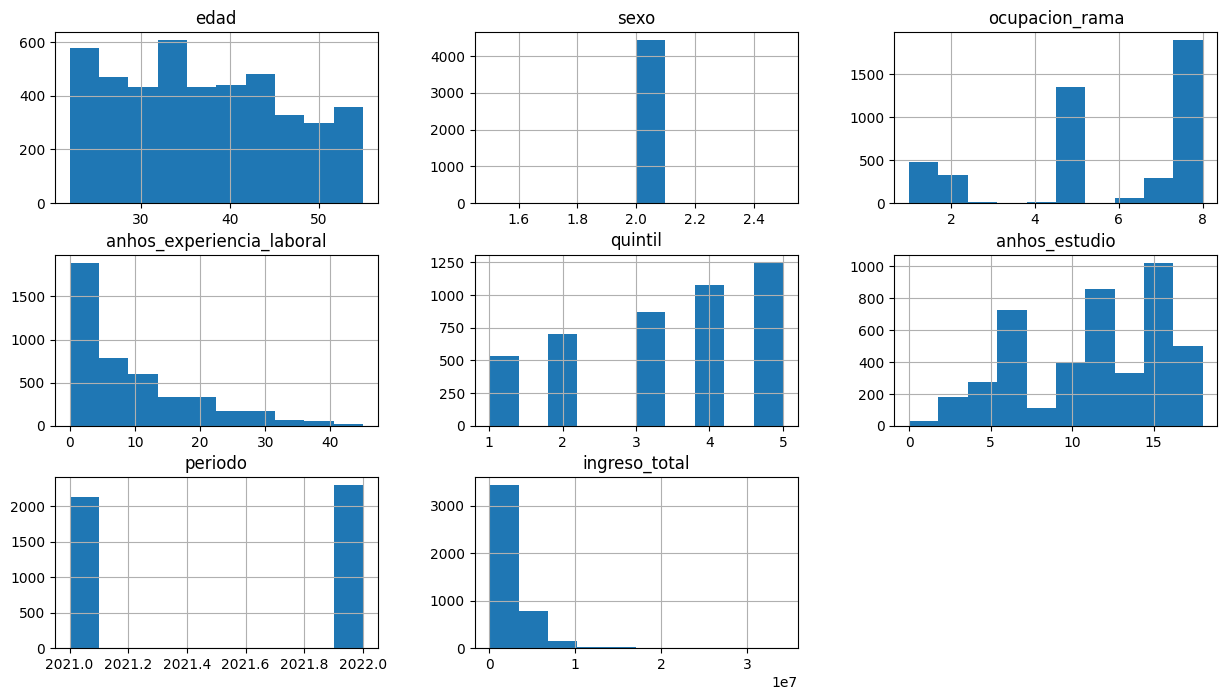

In [ ]:
df.hist(figsize=(15, 8))

## Estadísticas descriptivas de las variables que conforman el dataset

In [ ]:
df.describe()

,edad,sexo,ocupacion_rama,anhos_experiencia_laboral,quintil,anhos_estudio,periodo,ingreso_total
count,4421.000000,4421.0,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4.421000e+03
mean,36.957249,2.0,5.763176,9.12599,3.410314,11.318706,2021.519566,2.530867e+06
std,9.366627,0.0,2.440933,9.43929,1.357040,4.548779,0.499674,2.638954e+06
min,22.000000,2.0,1.000000,0.00000,1.000000,0.000000,2021.000000,5.083000e+03
25%,29.000000,2.0,5.000000,2.00000,2.000000,7.000000,2021.000000,9.737560e+05
50%,36.000000,2.0,6.000000,5.00000,4.000000,12.000000,2022.000000,2.000000e+06
75%,44.000000,2.0,8.000000,14.00000,5.000000,16.000000,2022.000000,3.067823e+06
max,55.000000,2.0,8.000000,45.00000,5.000000,18.000000,2022.000000,3.413710e+07


# Explorar la correlación de la variable dependiente con las demás variables del dataset

In [ ]:
correlation_matrix = df.drop(["educacion", "ocupacion_rama_des", "sexo"], axis=1).corr()
correlation_matrix

,edad,ocupacion_principal,ocupacion_rama,anhos_experiencia_laboral,quintil,anhos_estudio,periodo,ingreso_total
edad,1.000000,0.015482,-0.073215,0.534651,-0.007395,-0.311976,-0.014396,0.083284
ocupacion_principal,0.015482,1.000000,-0.136097,0.011980,-0.444689,-0.568506,-0.034324,-0.442287
ocupacion_rama,-0.073215,-0.136097,1.000000,-0.194954,0.272290,0.321533,0.047299,0.233811
anhos_experiencia_laboral,0.534651,0.011980,-0.194954,1.000000,-0.049199,-0.223559,0.001756,0.064645
quintil,-0.007395,-0.444689,0.272290,-0.049199,1.000000,0.504135,-0.000832,0.503708
anhos_estudio,-0.311976,-0.568506,0.321533,-0.223559,0.504135,1.000000,0.029955,0.433074
periodo,-0.014396,-0.034324,0.047299,0.001756,-0.000832,0.029955,1.000000,0.032824
ingreso_total,0.083284,-0.442287,0.233811,0.064645,0.503708,0.433074,0.032824,1.000000


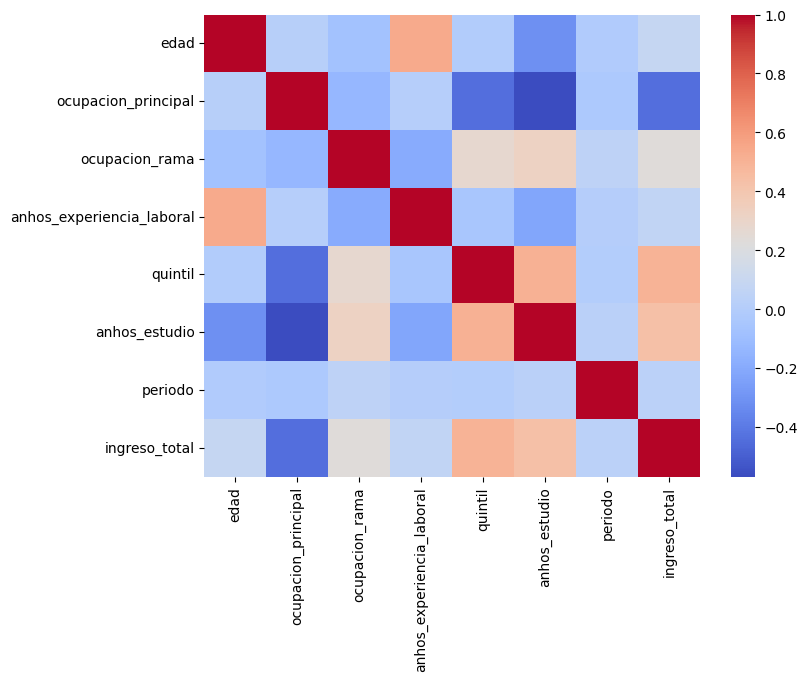

In [ ]:
# Crear el heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.show()

## Gráfico de dispersión de las variables

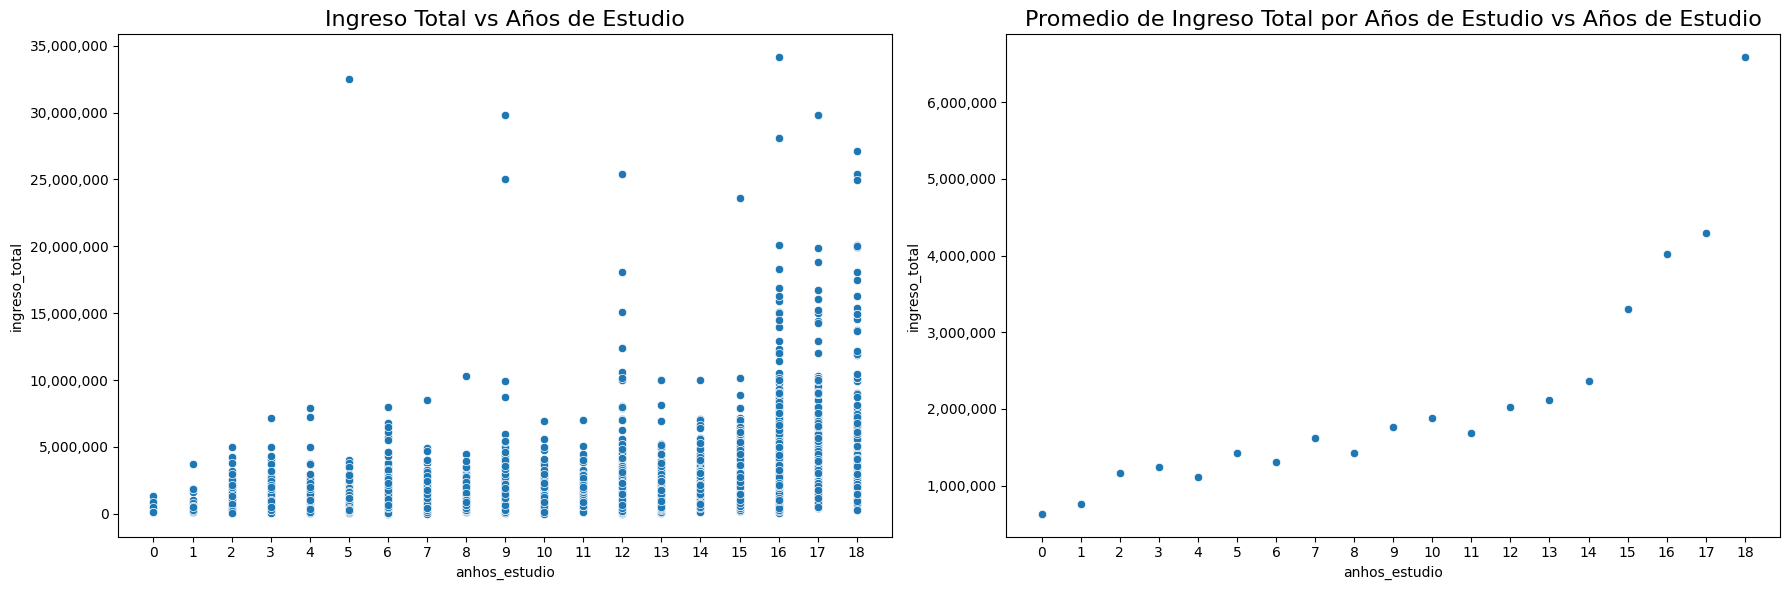

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Scatter plot original
sns.scatterplot(data=df, x=variable_x, y=variable_y, ax=axs[0])

# Modificar el eje X del primer gráfico
etiquetas_x = np.sort(df[variable_x].unique())
axs[0].set_xticks(etiquetas_x)

# Formatear las etiquetas del eje Y del primer gráfico
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))
axs[0].set_title("Ingreso Total vs Años de Estudio", fontsize=16)

# Segundo gráfico: Promedio de ingreso total por cantidad de años de estudio
df_agrupado = df.groupby(variable_x)[variable_y].mean().reset_index()

sns.scatterplot(data=df_agrupado, x=variable_x, y=variable_y, ax=axs[1])

# Modificar el eje X del segundo gráfico
etiquetas_x = np.sort(df_agrupado[variable_x].unique())
axs[1].set_xticks(etiquetas_x)

# Formatear las etiquetas del eje Y del segundo gráfico
axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))
axs[1].set_title("Promedio de Ingreso Total por Años de Estudio vs Años de Estudio", fontsize=16)

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En la primera figura se muestra el diagrama de dispersión de la variable años de estudio vs. ingreso total. A simple vista se observa una ligera correlación positiva entre ambas variables. No obstante, esta tendencia no es perfectamente lineal; además, dentro de los niveles hay una dispersión significativa.
Existen valores atípicos, especialmente en niveles más altos de años de estudio. Por ejemplo, hay algunos puntos muy por encima del resto en 16 y 18 años de estudio.
La segunda figura muestra el promedio de ingresos por cantidad de años de estudio vs. la cantidad de años de estudio. En este gráfico sí se puede observar una clara tendencia ascendente en el ingreso promedio a medida que aumentan los años de estudio

# <font color='red' style='font-size: 30px;'>Cálculo de la recta de regresión</font>

Se realiza una regresión lineal para modelar la relación entre los años de estudio y el ingreso total. La ecuación de la recta es y = 251116.397x – 281032.204. La ecuación se encuentra en la forma y = mx + b, donde m es la pendiente y b es la intersección con el eje Y.


In [ ]:
X = df[[variable_x]]

In [ ]:
y = df[variable_y]

In [ ]:
# Dividir el conjunto de datos en conjuntos para entrenamiento y test del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2811)

In [ ]:
# Cantidad de muestras en el conjunto de entrenamiento
X_train.shape

(3094, 1)

In [ ]:
# Cantidad de muestras en el conjunto de test
X_test.shape

(1327, 1)

In [ ]:
# Cantidad total de muestras
X_train.shape[0] + X_test.shape[0]

4421

In [ ]:
# Instanciar un objeto de regresión lineal
modelo = LinearRegression()

In [ ]:
# Ajustar el modelo al conjunto de muestras de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Obtener la ecuación de la recta
print ("Ecuación de la recta: y =", round(modelo.coef_[0], 3), "x +", round(modelo.intercept_, 3))

Ecuación de la recta: y = 251116.397 x + -281032.204


La pendiente indica el cambio promedio en el ingreso total por cada año adicional de estudio.
La intersección con el eje y, representa el ingreso total estimado cuando los años de estudio son 0. Si bien un ingreso negativo no tiene sentido en la realidad, el modelo predice un ingreso negativo de 281032.204 Gs para un hombre en el rango de edad de 22 a 55 años, con 0 años de estudio.


# <font color='red' style='font-size: 30px;'>Train</font>

## Generando las previsiones del modelo para los datos de ENTRENAMIENTO

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Representar la nube de puntos y la recta de regresión en el mismo gráfico

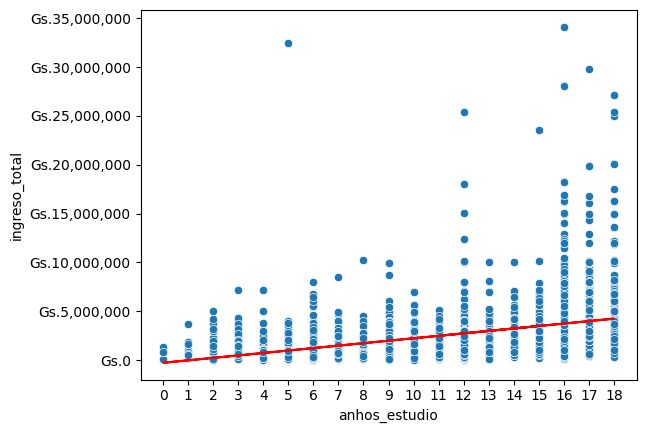

In [ ]:
sns.scatterplot(x=X_train[variable_x], y=y_train)

# Modificar el eje X
etiquetas_x = np.sort(X_train[variable_x].unique())
plt.xticks(ticks=etiquetas_x)

# Formatear las etiquetas del eje y
def currency(x, pos):
    return "{:,.0f}".format(x)

# Aplicar el formateador al eje y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "Gs.{:,.0f}".format(x)))

# Graficamos la linea de regresion ajustada
plt.plot(X_train, y_previsto_train, color='red')

plt.show()

## Obtener los residuos

In [ ]:
residuo = y_train - y_previsto_train
residuo

4036     1.974812e+06
13693    7.676354e+05
12238   -7.278990e+05
12993    7.931699e+05
7621    -2.495719e+06
             ...     
11288    2.424439e+05
8162     1.763170e+06
575     -1.829792e+06
3654    -9.606662e+05
15133   -2.312482e+05
Name: ingreso_total, Length: 3094, dtype: float64

## Graficar los residuos

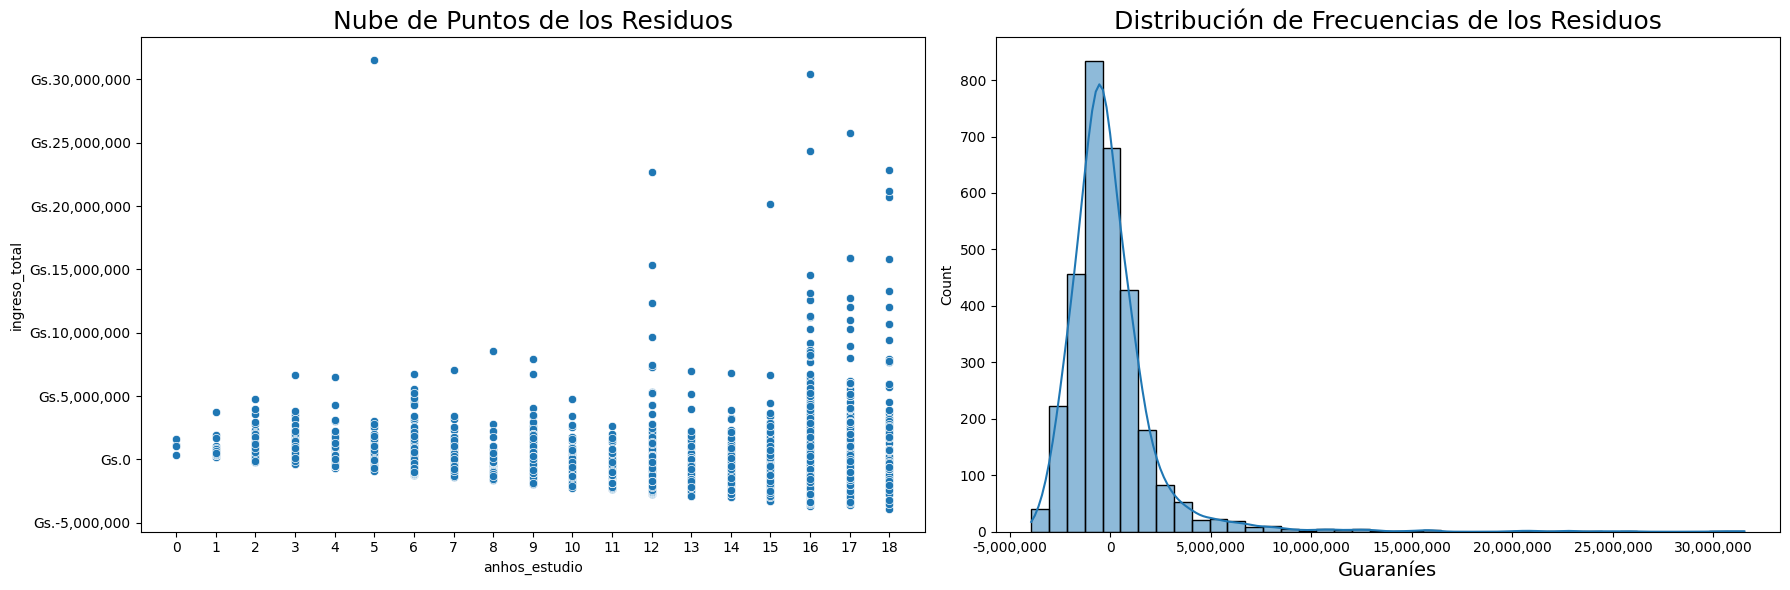

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Primer subplot: Scatter plot de X_train[variable_x] vs residuo
sns.scatterplot(x=X_train[variable_x], y=residuo, ax=axs[0])

# Modificar el eje X
etiquetas_x = np.sort(X_train[variable_x].unique())
axs[0].set_xticks(etiquetas_x)
axs[0].set_title("Nube de Puntos de los Residuos", fontsize=18)

# Formatear las etiquetas del eje Y
def currency(y, pos):
    return "Gs.{:,.0f}".format(y)

# Aplicar el formateador al eje Y
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(currency))

# Segundo subplot: Distribución de frecuencias de los residuos
ax2 = sns.histplot(residuo, bins=40, kde=True, ax=axs[1])
ax2.set_title("Distribución de Frecuencias de los Residuos", fontsize=18)
ax2.set_xlabel("Guaraníes", fontsize=14)

# Formatear las etiquetas del eje X
def currency(x, pos):
    return "{:,.0f}".format(x)

# Aplicar el formateador al eje X
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(currency))

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuo)

# Interpretación:
if p_value > 0.05:
    print("No se rechaza la hipótesis nula de normalidad.")
else:
    print("Se rechaza la hipótesis nula de normalidad.")


Se rechaza la hipótesis nula de normalidad.


Los residuos no siguen una distribución normal. La distribución es asimétrica a la derecha, hay más residuos en la parte derecha de la distribución que en la izquierda.

# <font color='red' style='font-size: 30px;'>Test</font>

## Obtener el coeficiente de determinación (R²) para las previsiones del modelo

In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.2


# <font color='red' style='font-size: 30px;'>Obtener Previsiones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
entrada = pd.DataFrame(data={"anhos_estudio": [0]})
entrada

,anhos_estudio
0,0


## Generar una previsión puntual

In [ ]:
modelo.predict(entrada)[0].round(3)

-281032.204

<hr style='border: 2px solid red;'>

In [ ]:
correlation_matrix = df[[variable_x, variable_y]].corr(method="pearson")
correlation_matrix

,anhos_estudio,ingreso_total
anhos_estudio,1.000000,0.433074
ingreso_total,0.433074,1.000000


# <font color='red' style='font-size: 30px;'>Análisis de Significancia</font>
<hr style='border: 2px solid red;'>

Para verificar la significancia de la relación, se establece un valor de α de 0.05.

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X[variable_x])
est = sm.OLS(y, X2)
est2 = est.fit()

# Obtener el p_value
p_values = est2.summary2().tables[1]['P>|t|']
print(p_values)
print("{:.203f}".format(p_values["anhos_estudio"]))

const             1.118645e-03
anhos_estudio    1.362312e-201
Name: P>|t|, dtype: float64
0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000136


Como se puede observar en la figura anterior, el valor de p es de 1.362312e-201, por lo tanto, p
< 0,05 y se rechaza la hipótesis nula.

In [ ]:
print(est2.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.187      
Dependent Variable:     ingreso_total       AIC:                   142367.8602
Date:                   2024-07-24 23:56    BIC:                   142380.6485
No. Observations:       4421                Log-Likelihood:        -71182.    
Df Model:               1                   F-statistic:           1020.      
Df Residuals:           4419                Prob (F-statistic):    1.36e-201  
R-squared:              0.188               Scale:                 5.6592e+12 
------------------------------------------------------------------------------
                 Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------
const         -312913.1211 95956.3510 -3.2610 0.0011 -501035.6397 -124790.6026
anhos_estudio  251246.0068  7866.3365 31.9394 0.0000  235824.0464  266667.96

# Explorar la correlación de la variable dependiente (ingreso total) con la variable independiente (años de estudio)

La correlación de Pearson entre ambas variables es de 0.431915, lo cual indica una correlación positiva de mediana intensidad.

## Obtener el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.18


El coeficiente de determinación obtenido sugiere que solo una pequeña parte de la variación en los ingresos totales puede ser explicada por los años de estudio. Existen otros factores importantes que afectan los ingresos que no están siendo capturados por este modelo.

# Conclusión

Teniendo en cuenta que el valor de p es menor a 0.05, se rechaza la hipótesis nula H0:1 = 0,
ya que la cantidad de años de estudio es una variable significativa. Asimismo, el coeficiente de
correlación de Pearson indica una correlación positiva de mediana intensidad.
Sin embargo, dado el coeficiente de determinación de 0.18, se concluye que, si bien la variable
independiente tiene un efecto estadísticamente significativo en la variable dependiente, el
modelo de regresión lineal simple, no consigue explicar bien su variabilidad.
Como futuras investigaciones, se podrían considerar otras variables que pudieran influir en el
ingreso total, además de los años de estudio.